In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [4]:
# Load preprocessed data from EDA script
df = pd.read_csv('./train_processed.csv',index_col=0)
df_encode = pd.read_csv('./train_processed_encoded.csv',index_col=0)

In [5]:
df.head()

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Status,Respiratory Rate (breaths/min),...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,2.0,Yes,No,Yes,No,4.760603,23.0,20.0,Alive,Normal (30-60),...,Singular,9.857562,slightly abnormal,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,4.0,Yes,Yes,No,No,4.910669,23.0,23.0,Deceased,Tachypnea,...,Multiple,5.522560,normal,1.0,1.0,1.0,1.0,0.0,Mitochondrial genetic inheritance disorders,Cystic fibrosis
2,6.0,Yes,No,No,No,4.893297,41.0,22.0,Alive,Normal (30-60),...,Singular,7.477132,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,12.0,Yes,No,Yes,No,4.705280,21.0,20.0,Deceased,Tachypnea,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,11.0,Yes,No,Yes,Yes,4.720703,32.0,20.0,Alive,Tachypnea,...,Multiple,4.098210,slightly abnormal,0.0,0.0,0.0,0.0,0.0,Multifactorial genetic inheritance disorders,Cancer


In [6]:
df_encode.head()

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Status,Respiratory Rate (breaths/min),...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,2.0,1.0,0.0,1.0,0.0,4.760603,5.0,20.0,0.0,0.0,...,1.0,9.857562,3.0,1.0,1.0,1.0,1.0,1.0,0.0,5.0
1,4.0,1.0,1.0,0.0,0.0,4.910669,5.0,23.0,1.0,1.0,...,0.0,5.522560,2.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0
2,6.0,1.0,0.0,0.0,0.0,4.893297,23.0,22.0,0.0,0.0,...,1.0,7.477132,2.0,0.0,1.0,1.0,1.0,1.0,1.0,3.0
3,12.0,1.0,0.0,1.0,0.0,4.705280,3.0,20.0,1.0,1.0,...,1.0,7.919321,1.0,0.0,0.0,1.0,0.0,0.0,0.0,6.0
4,11.0,1.0,0.0,1.0,1.0,4.720703,14.0,20.0,0.0,1.0,...,0.0,4.098210,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [7]:
# Check columns
df_encode.columns

Index(['Patient Age', 'Genes in mother's side', 'Inherited from father',
       'Maternal gene', 'Paternal gene', 'Blood cell count (mcL)',
       'Mother's age', 'Father's age', 'Status',
       'Respiratory Rate (breaths/min)', 'Heart Rate (rates/min', 'Test 1',
       'Test 2', 'Test 3', 'Test 4', 'Test 5', 'Follow-up', 'Gender',
       'Folic acid details (peri-conceptional)',
       'H/O serious maternal illness', 'H/O radiation exposure (x-ray)',
       'H/O substance abuse', 'Assisted conception IVF/ART',
       'History of anomalies in previous pregnancies',
       'No. of previous abortion', 'Birth defects',
       'White Blood cell count (thousand per microliter)', 'Blood test result',
       'Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5',
       'Genetic Disorder', 'Disorder Subclass'],
      dtype='object')

In [12]:
# View genetic disorders
print(df['Genetic Disorder'].value_counts())
print(df['Disorder Subclass'].value_counts())

disorders = df['Genetic Disorder'].unique()
disorderSub = df['Disorder Subclass'].unique()

print(len(disorders), disorders)
print(len(disorderSub), disorderSub)

Mitochondrial genetic inheritance disorders     12348
Single-gene inheritance diseases                 7664
Multifactorial genetic inheritance disorders     2071
Name: Genetic Disorder, dtype: int64
Leigh syndrome                         7328
Mitochondrial myopathy                 4405
Cystic fibrosis                        3448
Tay-Sachs                              2833
Diabetes                               1817
Hemochromatosis                        1355
Leber's hereditary optic neuropathy     648
Alzheimer's                             152
Cancer                                   97
Name: Disorder Subclass, dtype: int64
3 ['Mitochondrial genetic inheritance disorders'
 'Multifactorial genetic inheritance disorders'
 'Single-gene inheritance diseases']
9 ["Leber's hereditary optic neuropathy" 'Cystic fibrosis' 'Diabetes'
 'Leigh syndrome' 'Cancer' 'Tay-Sachs' 'Hemochromatosis'
 'Mitochondrial myopathy' "Alzheimer's"]


In [21]:
# View disorder / disorder subclass relationship
disorderSubclasses = df.groupby(['Genetic Disorder','Disorder Subclass']).size()
disorderSubclasses

Genetic Disorder                              Disorder Subclass                  
Mitochondrial genetic inheritance disorders   Alzheimer's                              19
                                              Cancer                                    6
                                              Cystic fibrosis                         303
                                              Diabetes                                164
                                              Hemochromatosis                         127
                                              Leber's hereditary optic neuropathy     648
                                              Leigh syndrome                         6399
                                              Mitochondrial myopathy                 4405
                                              Tay-Sachs                               277
Multifactorial genetic inheritance disorders  Alzheimer's                             133
                  

In [27]:
disordersList = ['Mitochondrial genetic inheritance disorders - Alzheimer\'s',
       'Mitochondrial genetic inheritance disorders - Cancer',
       'Mitochondrial genetic inheritance disorders - Cystic fibrosis',
       'Mitochondrial genetic inheritance disorders - Diabetes',
       'Mitochondrial genetic inheritance disorders - Hemochromatosis',
       'Mitochondrial genetic inheritance disorders - Leber\'s hereditary optic neuropathy',
       'Mitochondrial genetic inheritance disorders - Leigh syndrome',
       'Mitochondrial genetic inheritance disorders - Mitochondrial myopathy',
       'Mitochondrial genetic inheritance disorders - Tay-Sachs',
       'Multifactorial genetic inheritance disorders - Alzheimer\'s',
       'Multifactorial genetic inheritance disorders - Cancer',
       'Multifactorial genetic inheritance disorders - Diabetes',
       'Multifactorial genetic inheritance disorders - Leigh syndrome',
       'Single-gene inheritance diseases - Cystic fibrosis',
       'Single-gene inheritance diseases - Hemochromatosis',
       'Single-gene inheritance diseases - Leigh syndrome',
       'Single-gene inheritance diseases - Tay-Sachs']

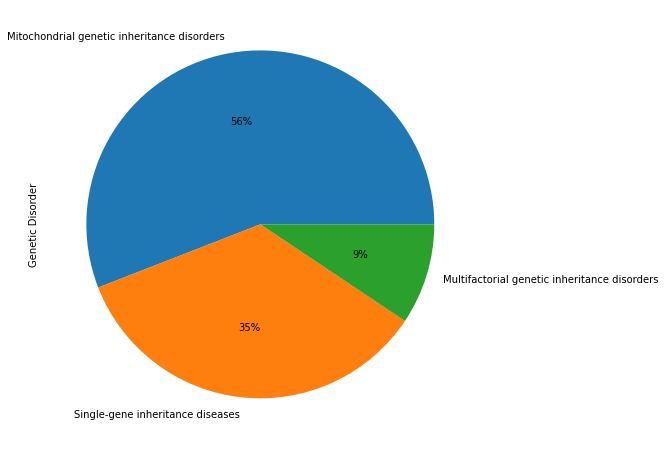

In [61]:
# Plot distribution of genetic disorders
figure = plt.figure(figsize=(20,8))
df['Genetic Disorder'].value_counts().plot.pie(autopct='%.0f%%')
plt.savefig('./figures/DisorderPieChart.png')
plt.show()

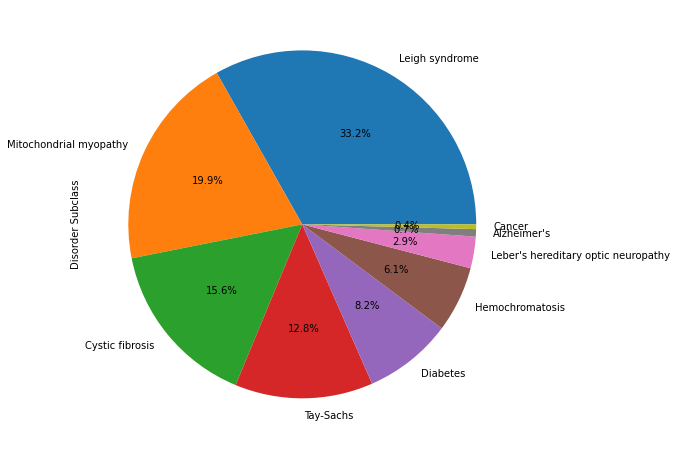

In [62]:
# Plot distribution of genetic disorders subtypes
figure = plt.figure(figsize=(20,8))
df['Disorder Subclass'].value_counts().plot.pie(autopct='%1.1f%%')
plt.savefig('./figures/SubclassPieChart.png')
plt.show()

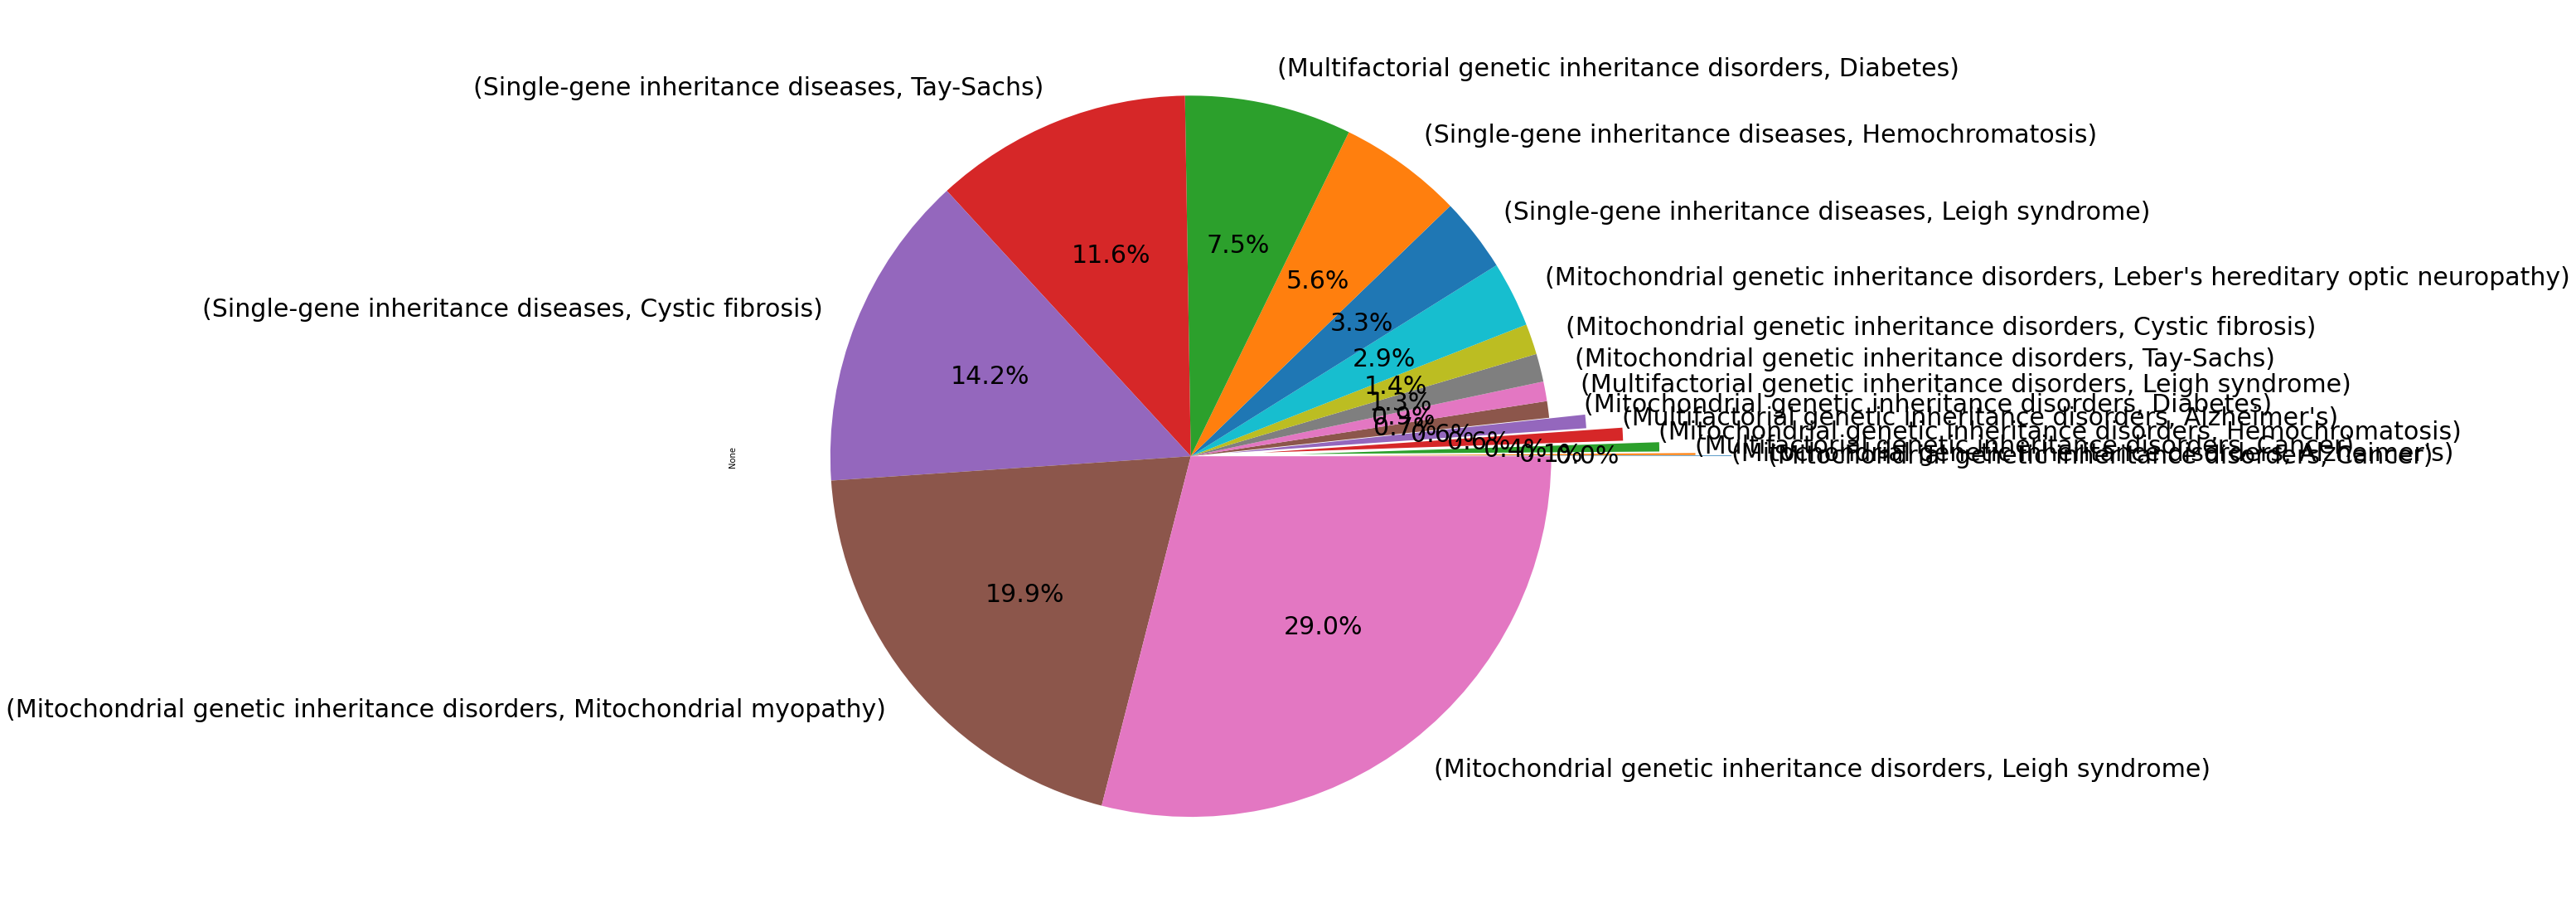

In [63]:
# Plot distribution of genetic disorders + disorder subtype combinations
figure = plt.figure(figsize=(30,20))
disorderSubclasses.sort_values().plot.pie(autopct='%1.1f%%', fontsize=30, explode=(0.5,0.4,0.3,0.2,0.1,0,0,0,0,0,0,0,0,0,0,0,0))
plt.savefig('./figures/Disorder+SubclassPieChart.png')
plt.show()

In [39]:
# One-hot encode disorders to look for correlations between disorder and data
# https://www.researchgate.net/post/Can_I_use_Pearsons_correlation_coefficient_to_know_the_relation_between_perception_and_gender_age_income#:~:text=For%20a%20dichotomous%20categorical%20variable,a%20point%2Dbiserial%20correlation%20coefficient.
df_encode['Disorder+Subclass'] = df['Genetic Disorder'] + ' - ' + df['Disorder Subclass']
onehot = pd.get_dummies(df_encode['Disorder+Subclass'])
df_encode.drop(['Genetic Disorder', 'Disorder Subclass','Disorder+Subclass'], axis=1, inplace=True)
df_encode = df_encode.join(onehot)
df_encode.head()

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Status,Respiratory Rate (breaths/min),...,Mitochondrial genetic inheritance disorders - Mitochondrial myopathy,Mitochondrial genetic inheritance disorders - Tay-Sachs,Multifactorial genetic inheritance disorders - Alzheimer's,Multifactorial genetic inheritance disorders - Cancer,Multifactorial genetic inheritance disorders - Diabetes,Multifactorial genetic inheritance disorders - Leigh syndrome,Single-gene inheritance diseases - Cystic fibrosis,Single-gene inheritance diseases - Hemochromatosis,Single-gene inheritance diseases - Leigh syndrome,Single-gene inheritance diseases - Tay-Sachs
0,2.0,1.0,0.0,1.0,0.0,4.760603,5.0,20.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,4.0,1.0,1.0,0.0,0.0,4.910669,5.0,23.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,6.0,1.0,0.0,0.0,0.0,4.893297,23.0,22.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
3,12.0,1.0,0.0,1.0,0.0,4.705280,3.0,20.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,11.0,1.0,0.0,1.0,1.0,4.720703,14.0,20.0,0.0,1.0,...,0,0,0,1,0,0,0,0,0,0


In [41]:
# Calculate correlations
df_encode_corr = df_encode.corr()

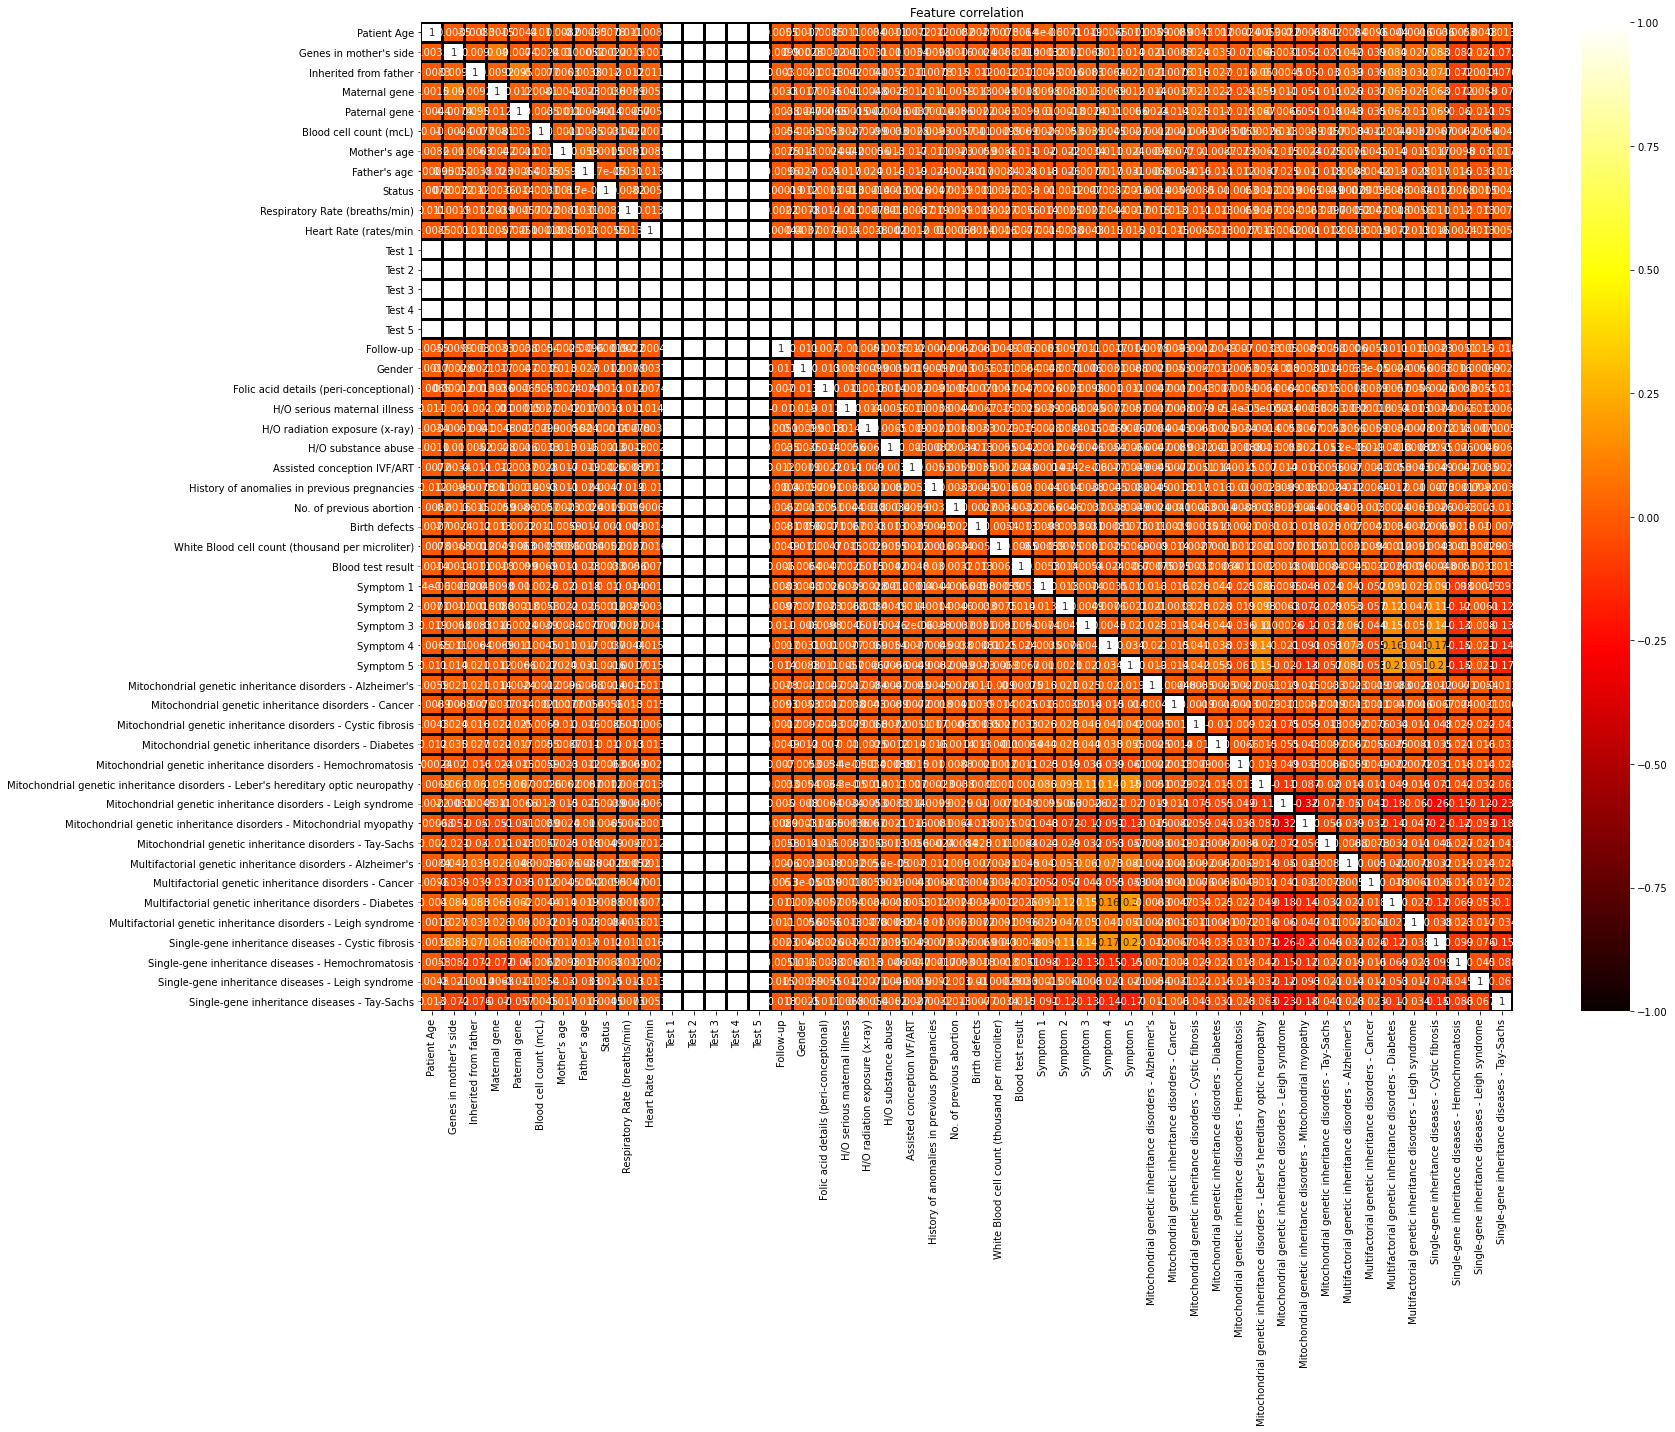

In [42]:
# Plot correlation heatmap with one-hot encoded disorders
figure = plt.figure(figsize=(25,20))
sns.heatmap(df_encode_corr,annot=True,vmin=-1,center=0,vmax=1,linewidths=2,linecolor="black",cmap="hot")
plt.title("Feature correlation")
plt.tight_layout()
plt.show()

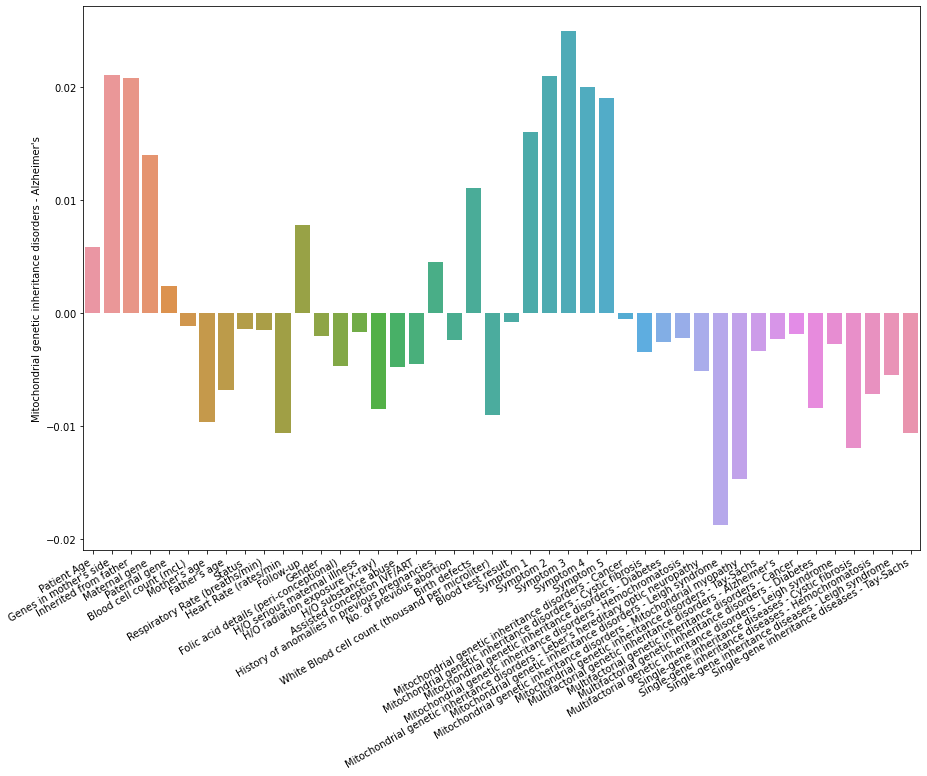

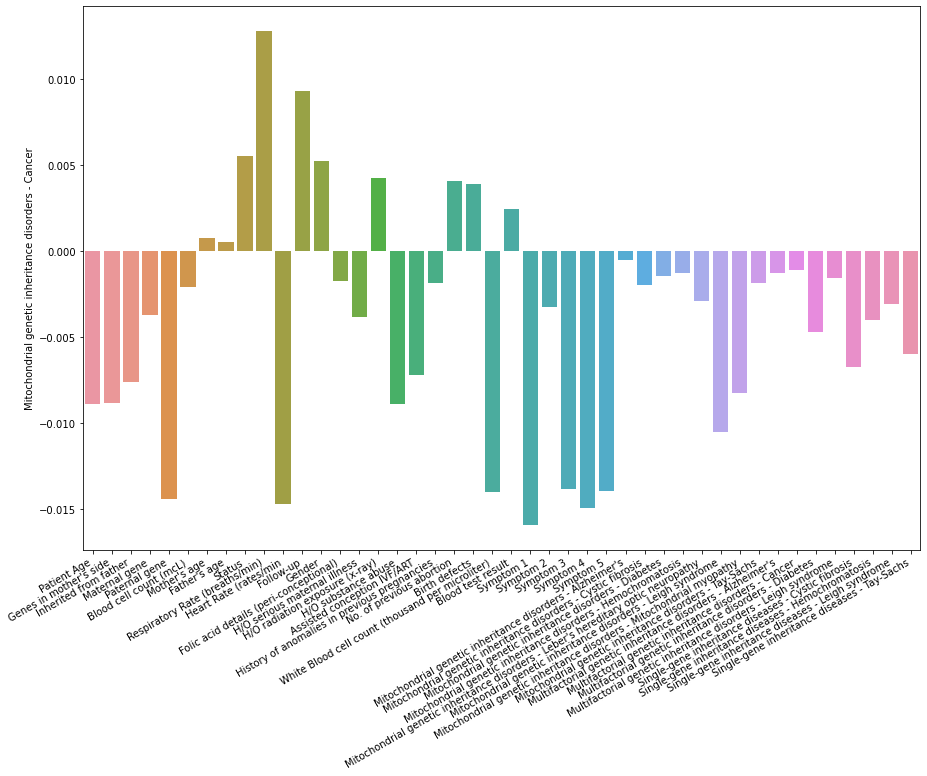

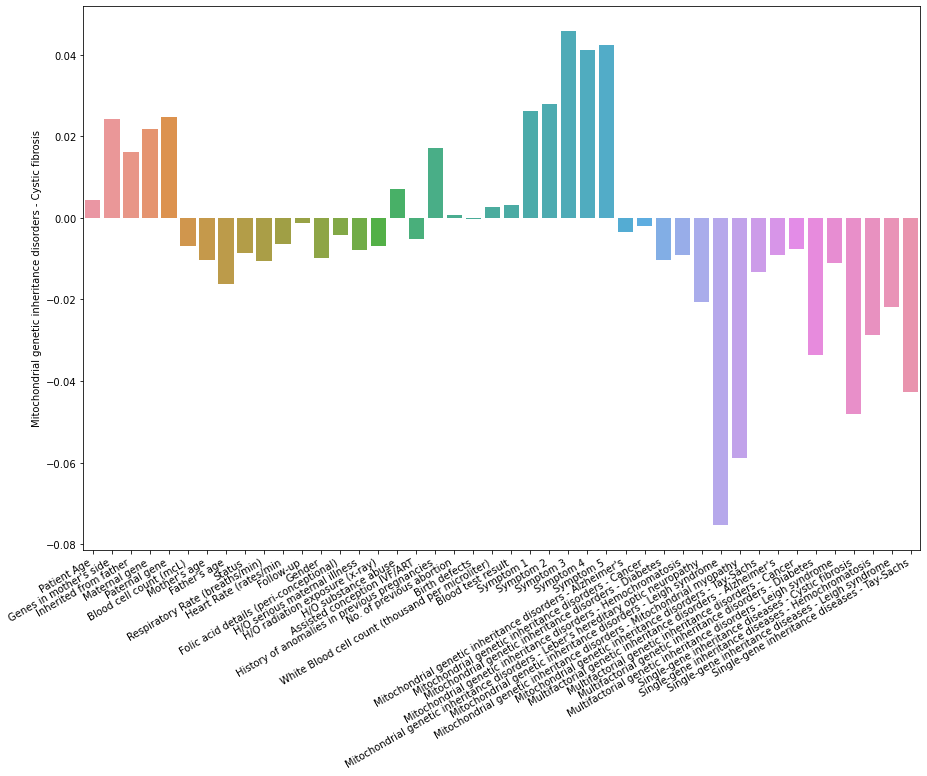

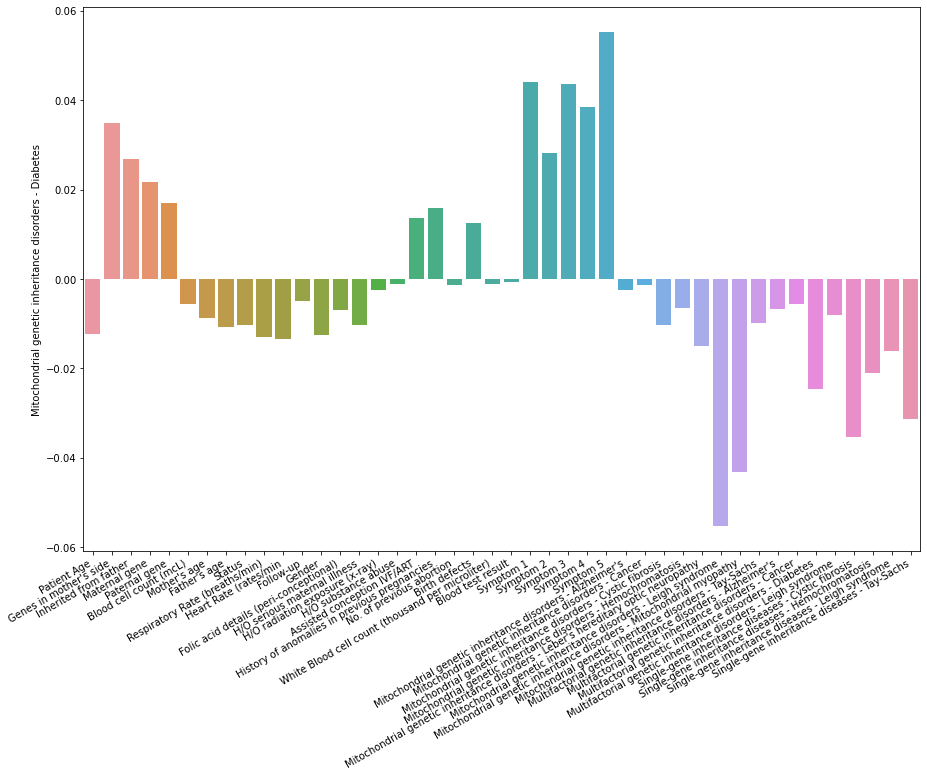

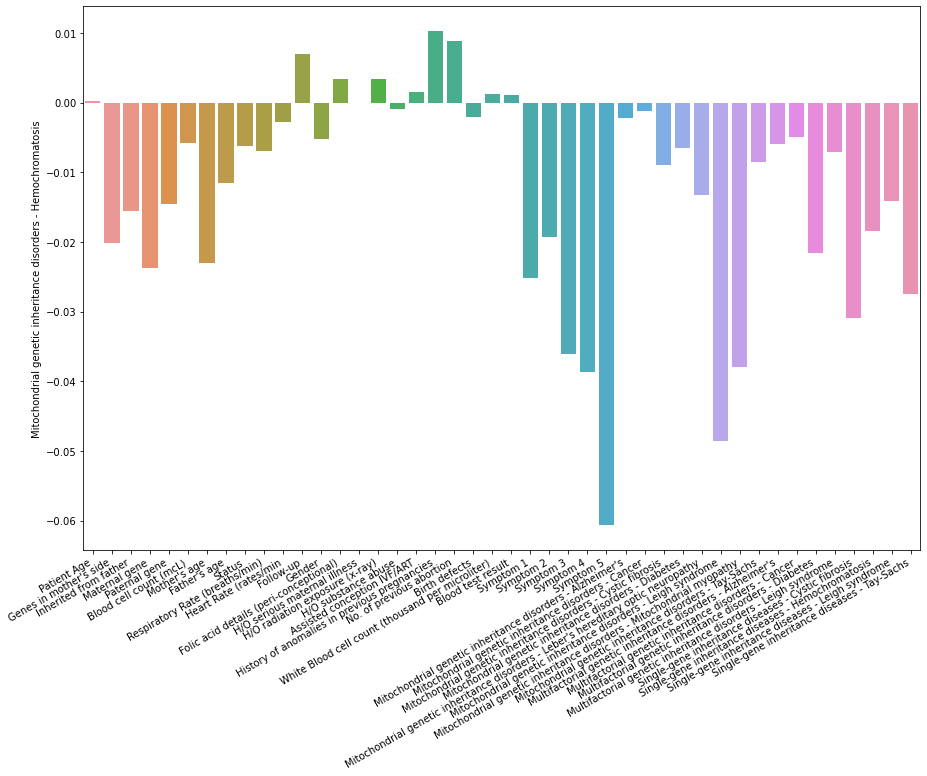

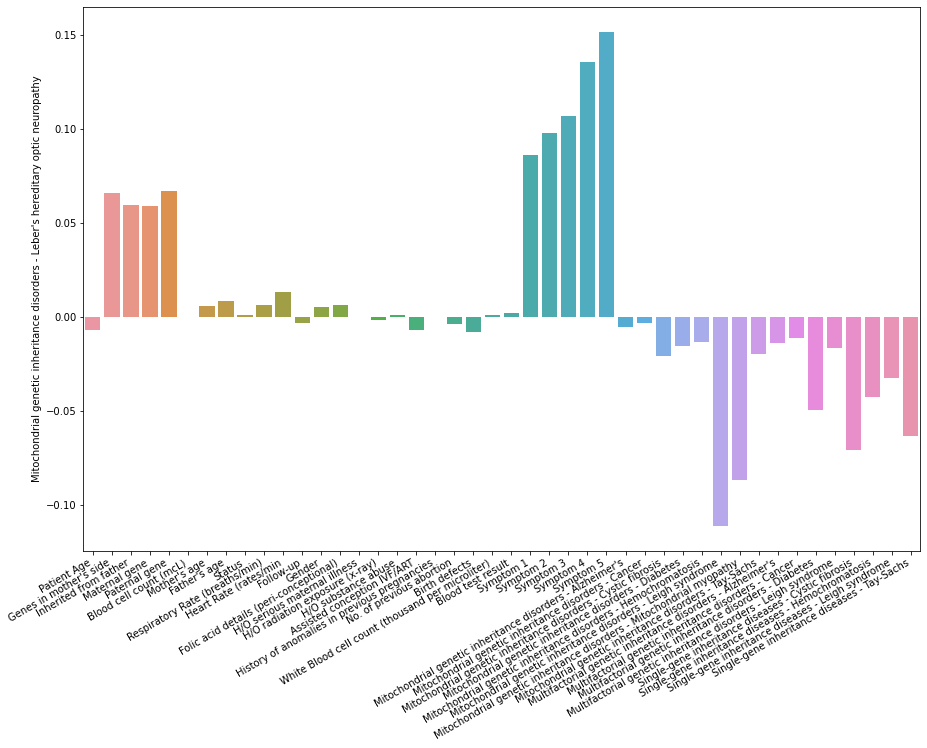

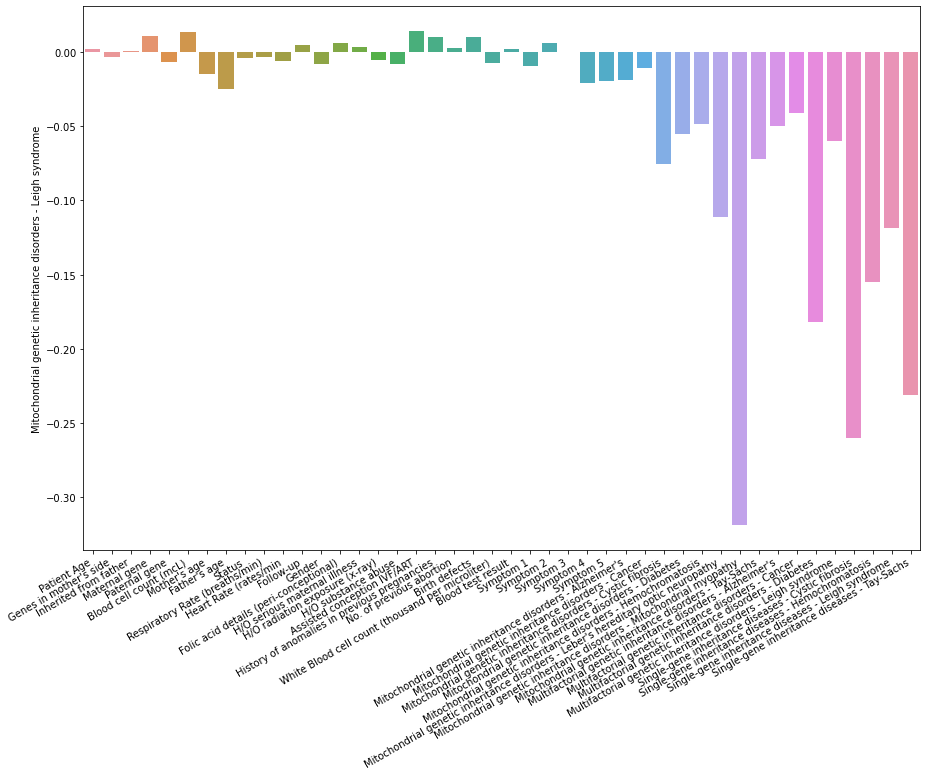

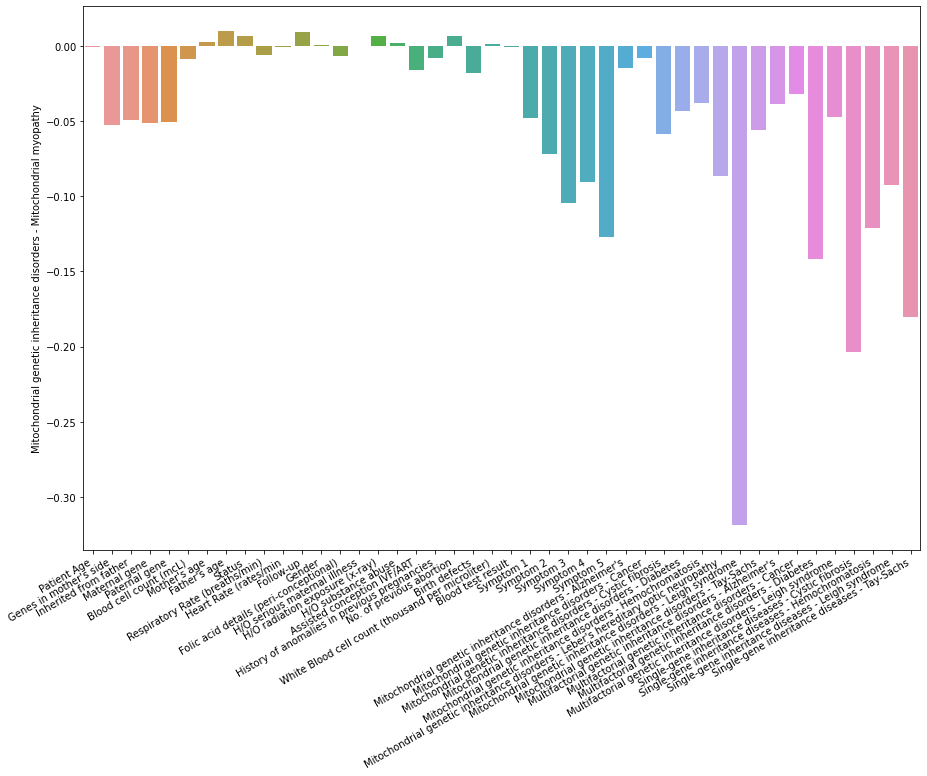

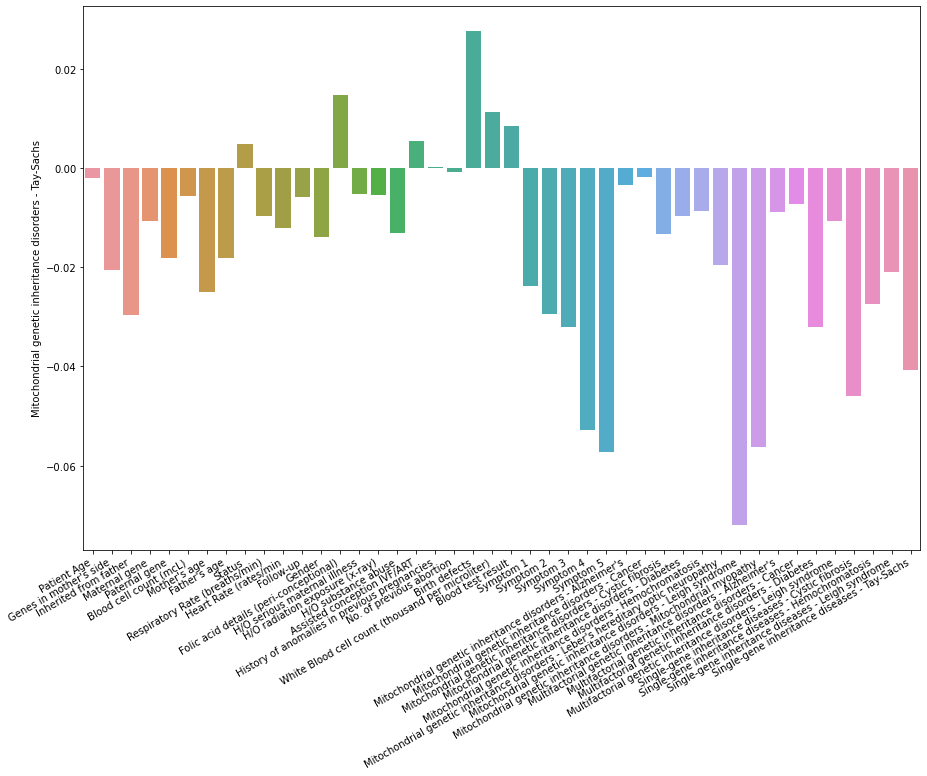

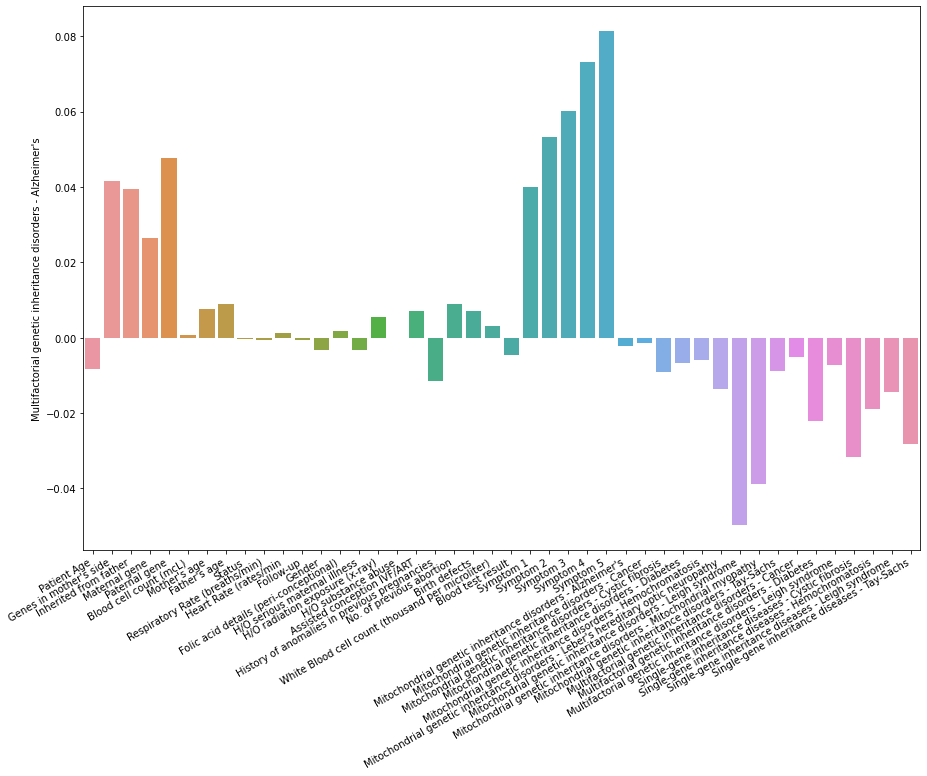

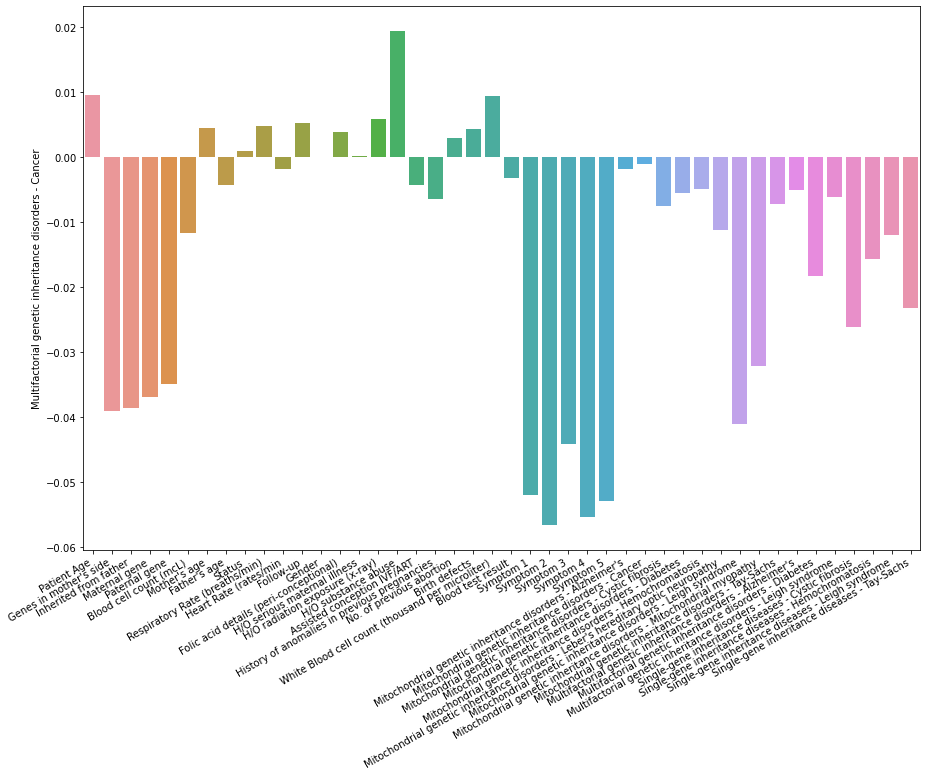

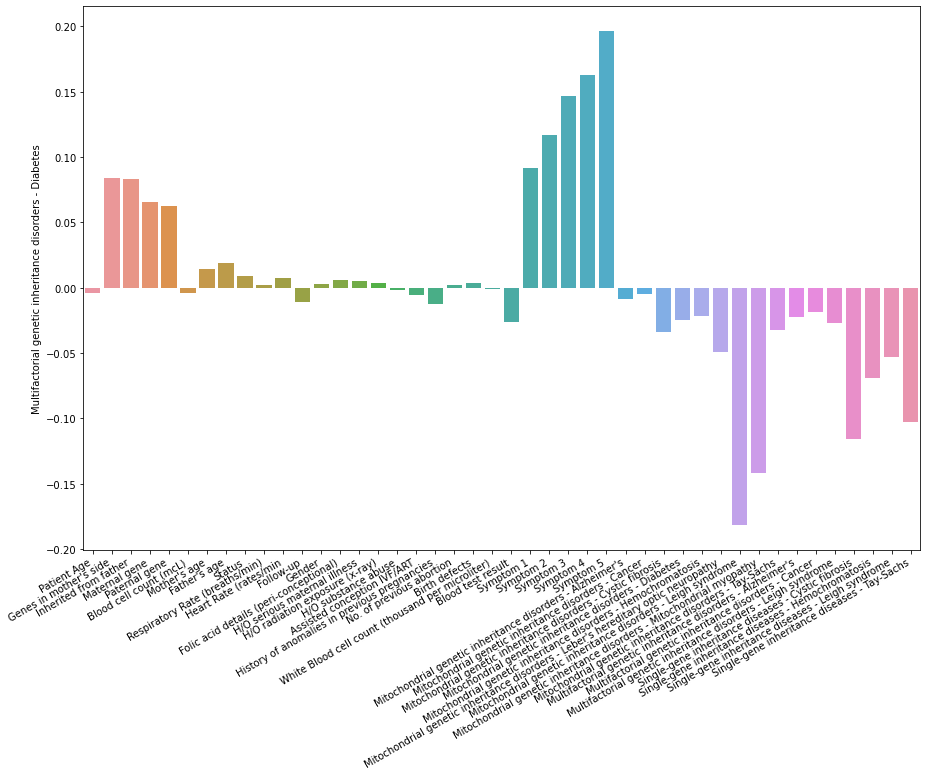

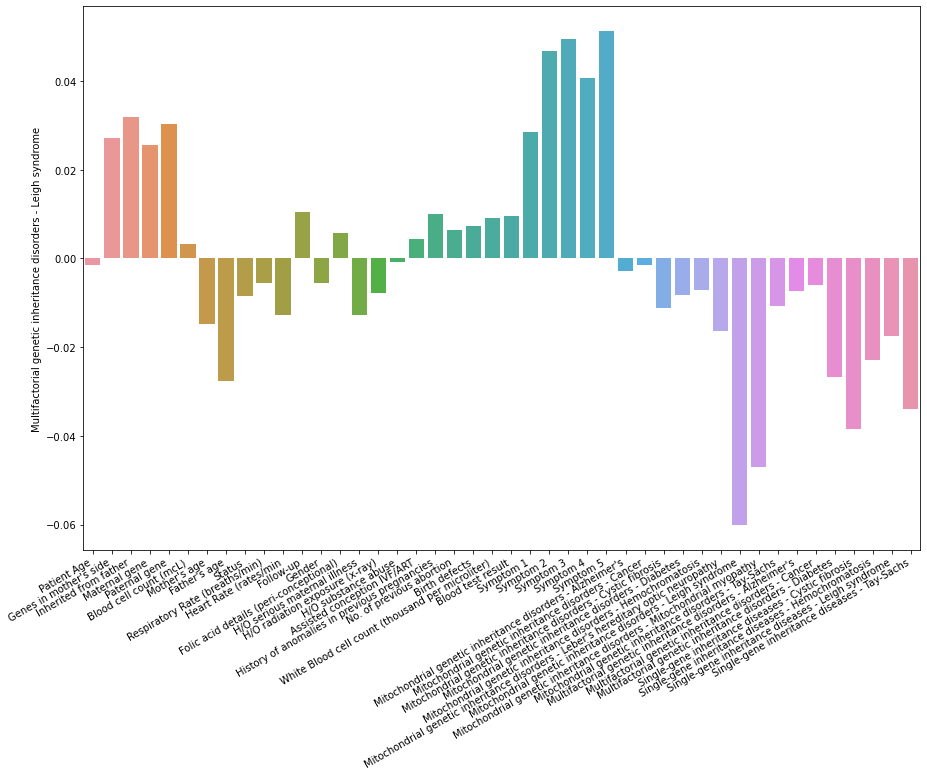

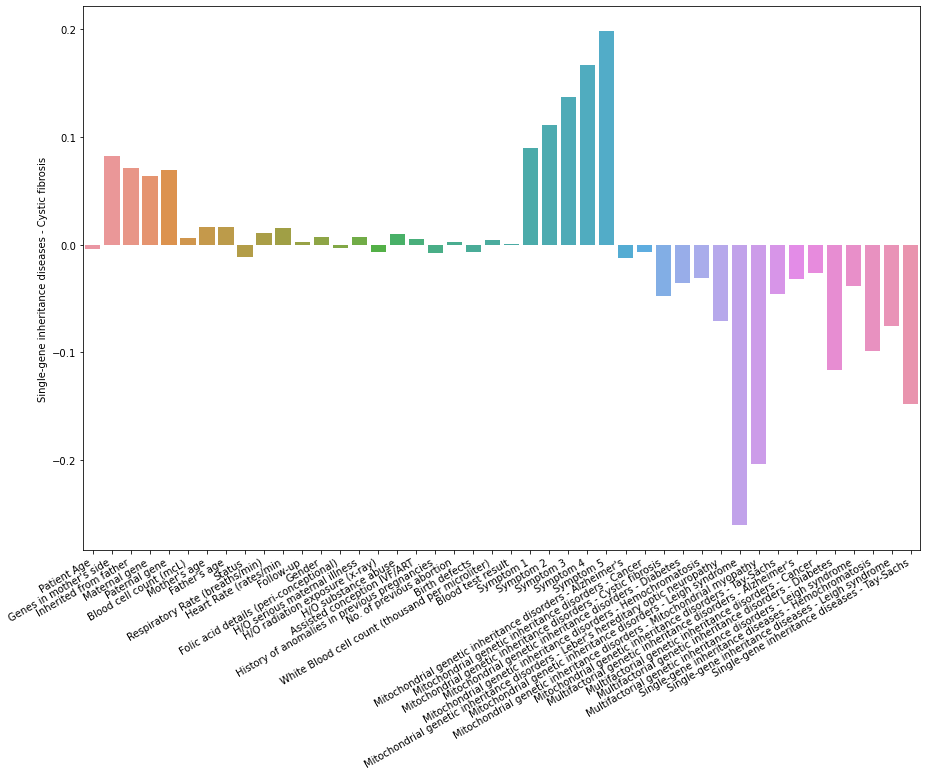

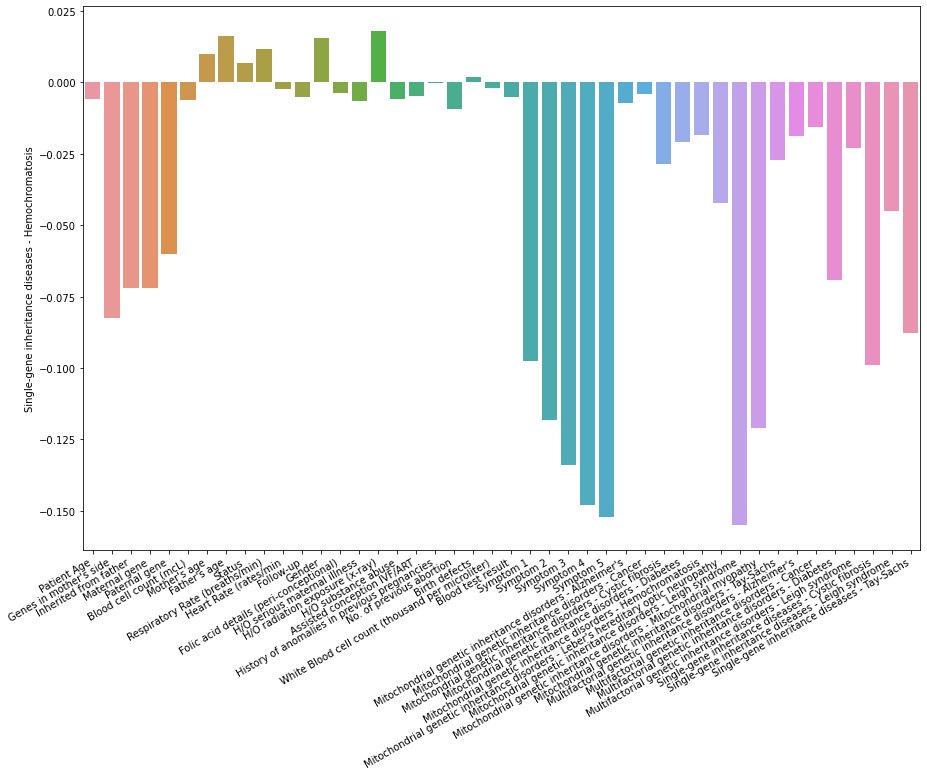

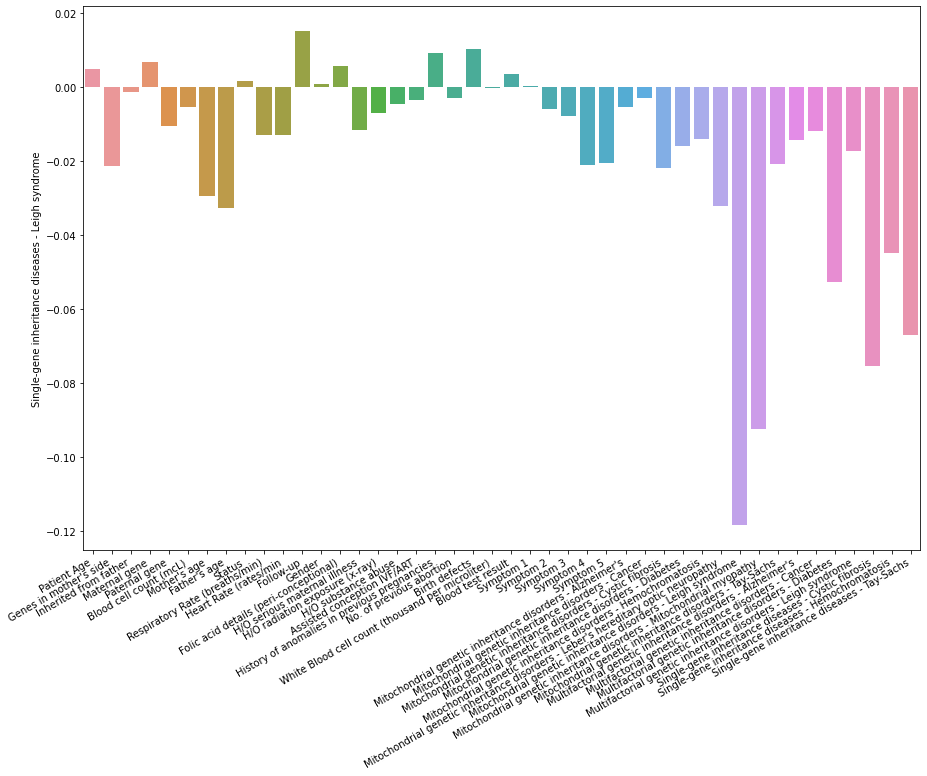

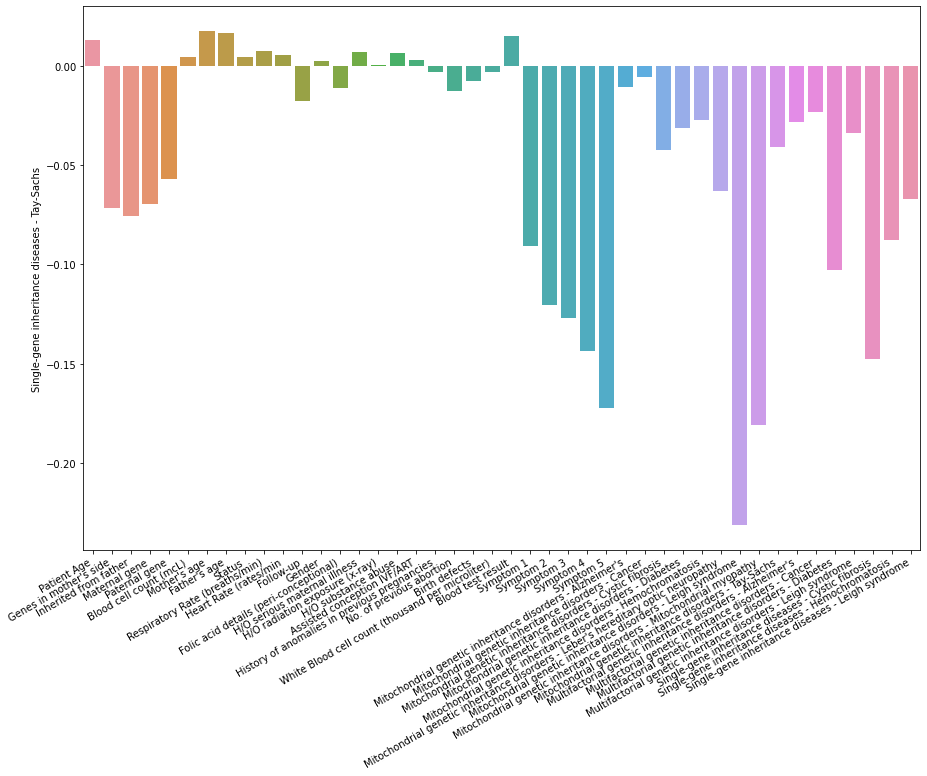

In [77]:
# Check feature correlation with each distinct disorder
for dis in disordersList :
    corrs = df_encode_corr[[dis]].dropna().drop(dis)
    figure = plt.figure(figsize=(15,10))
    g = sns.barplot(corrs.index, corrs[dis])
    g.set_xticklabels(g.get_xticklabels(), rotation=30, ha='right')
    plt.savefig('./figures/'+dis+'_corr.png')